# 共分散と相関

共分散は二つのデータセット間の関係を表す数値。

例として、販売サイトの運営時、サイトの表示速度とユーザーの消費金額の関係を調べよう。

numpyには共分散を簡単に求めることのできるメソッドがあるが、今回は処理の内容を確かめるためにコードを書いて求めてみます。基本的に、二つのデータセットは平均値からの距離のベクトルとし、それらの内積を計算します。幾何学的には二つの高次元なベクトルの間の角度を求めているのですが、二つのデータセットの類似性を値にすることができます。

最初に、全くランダムで無関係な表示速度と購入合計額のデータセットをそれぞれ用意しよう。相関が無いため、共分散はとても小さくなります。

-0.29490043679784633

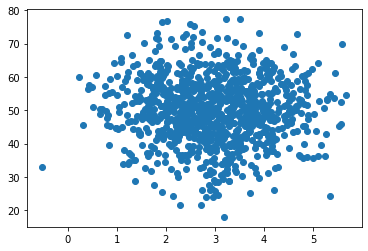

In [2]:
%matplotlib inline

import numpy as np
from pylab import *

# 平均値からのズレを求める
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

# 内積を求める
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)
# 二つのデータセットに相関はない

それでは、表示速度とユーザーの消費金額に関係を持たせてみます。負の共分散は、一方が増加すると一方が減少することを意味します。

-9.417340642381491

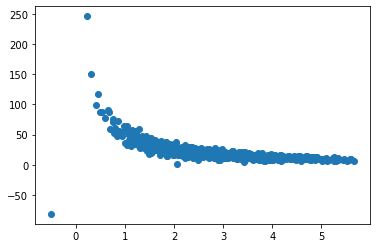

In [3]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

# 表示速度が遅くなるほど、消費金額が少なくなる

この値は何を意味するのでしょうか。実は共分散の値は個々の値に敏感に反応するので解釈が難しいのです。

相関であれば標準偏差を用いて標準化を行うので、値が-1（完全な逆相関）から1（完全な相関）の間に収まり解釈がしやすいです。

In [4]:
def correlation(x, y):
    """
    標準偏差を使う
    """
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

-0.6407206710240321

numpyを使えばnumpy.corrcoefにより簡単に計算できます。引数として渡されたすべての配列間の、相関係数をマトリックスで返します。 

In [5]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.64007995],
       [-0.64007995,  1.        ]])

(コンピュータの数学計算の精度により、前の値と正確には一致していません。)

直線の式を使って完全な相関を作ってみましょう。 （今回も、コンピュータの数学計算の精度により正確に-1にはなっていません。）

-1.001001001001001

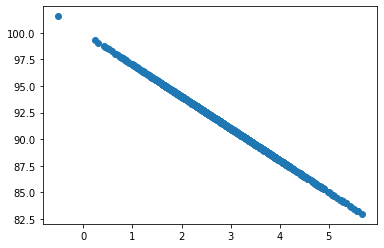

In [6]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

相関は因果関係を意味するわけではないことに注意しましょう。